In [97]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [98]:
"""
Python imports
"""

import predict
import csv
import numpy as np
import matplotlib.pyplot as plt

In [99]:
"""
Global variables
"""

TEST_FILE_NAME = "student_data.csv"
DataSet = list[dict]
Matrix = list[list[int]]
FIGSIZE = (10, 5)
NBINS = 10
COLORS = ["red", "blue", "green", "orange", "purple", "grey", "yellow", "maroon"]

In [100]:
"""
Helper functions
"""

def get_test_data(filename: str) -> DataSet:
    """
    Returns test data from filename as a DataSet
    :param filename: name of csv file to read
    :return imported data
    """
    file = open(filename, 'r')
    reader = csv.DictReader(file)
    data = [row for row in reader]
    return data


def bar_chart(data: DataSet, feature_name: str, color: str) -> None:
    """
    Plots a bar chart of a feature in a data set
    :param data: DataSet containing the feature
    :param feature_name: Name of the feature to plot
    :param color: color for the bar chart
    :return None
    """
    bins = {}
    for row in data:
        if row[feature_name] not in bins:
            bins[row[feature_name]] = 0
        bins[row[feature_name]] += 1
    classes, values = list(bins.keys()), list(bins.values())
    fig, ax = plt.subplots()
    ax.barh(classes, values, color=color)
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    ax.invert_yaxis()
    for i in ax.patches:
        plt.text(
            i.get_width()+0.2, i.get_y()+0.5,
            str(round((i.get_width()), 2)),
            fontsize = 10,
            fontweight ='bold',
            color ='grey')
    ax.set_title(f"Test dataset distribution of {feature_name}", loc="left")
    plt.ylabel(feature_name)
    plt.xlabel("Count")
    plt.show()


def histogram(data: DataSet, feature_name: str, color: str) -> None:
    """
    Plots a histogram of a feature in a data set
    :param data: DataSet containing the feature
    :param feature_name: Name of the feature to plot
    :param color: color for the histogram
    :return None
    """
    if str(float(data[0][feature_name])) == data[0][feature_name]:
        values = [float(row[feature_name]) for row in data]
    else:
        values = [int(row[feature_name]) for row in data]
    fig, ax = plt.subplots()
    ax.hist(values, bins=NBINS, color=color)
    ax.set_title(f"Test dataset distribution of {feature_name}", loc="left")
    plt.xlabel(feature_name)
    plt.ylabel("Count")
    plt.show()



def plot_distribution(data: DataSet, feature_name: str, color: str) -> None:
    """
    Plots the distribution of a feature in a data set
    :param data: DataSet containing the feature
    :param feature_name: Name of the feature to plot
    :param color: color for the plot
    :return None
    """
    is_categorical = True
    try:
        numeric = int(data[0][feature_name])
        if str(numeric) == data[0][feature_name]:
            is_categorical = False
    except:
        try:
            numeric = float(data[0][feature_name])
            if str(numeric) == data[0][feature_name]:
                is_categorical = False
        except:
            pass
    if is_categorical:
        bar_chart(data, feature_name, color)
    else:
        histogram(data, feature_name, color)


def plot_feature_distributions(data: DataSet) -> None:
    """
    Plots all feature distributions
    :param data: data to plot distributions of
    :return None
    """
    valid_features = set(data[0].keys())
    valid_features.remove("Student ID")
    valid_features = list(valid_features)
    for i in range(len(valid_features)):
        feature_name = valid_features[i]
        color = COLORS[i]
        plot_distribution(data, feature_name, color)


def get_predictions(data: DataSet) -> None:
    """
    Runs predict on dataset and adds it as a column to the data
    :param data: DataSet to predict with
    :return None (side effects only)
    """
    for row in data:
        result = predict.predict(row)
        row["Prediction"] = str(result["good_employee"])
        
    
def confusion_matrix(data: DataSet) -> Matrix:
    """
    Gets the confusion matrix for the data set after prediction
    :param data: data containing predictions
    :return: confusion matrix as a 2d list
    """
    matrix = [[0, 0], [0, 0]]
    for row in data:
        row_index = 0 if row["Good Candidate"] == "0" else 1
        col_index = 0 if row["Prediction"] == "0" else 1
        matrix[row_index][col_index] += 1
    return matrix


def display_from_predictions(data: DataSet, matrix: Matrix) -> None:
    """
    Displays the prediction distribution and confusion matrix
    :param data: data containing predictions
    :param matrix: confusion matrix
    :return: None
    """
    bar_chart(data, "Prediction", "grey")
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            ax.text(
                x=i,
                y=j,
                s=matrix[i][j],
                va='center',
                ha='center',
                size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


def report_from_predictions(matrix: Matrix) -> None:
    """
    Reports statistics from predictions and matrix
    :param data: data containing predictions
    :param matrix: confusion matrix
    :return: None
    """
    n = matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]
    print(f"Correctly predicted: {matrix[0][0] + matrix[1][1]}")
    print(f"Incorrectly predicted: {matrix[0][1] + matrix[1][0]}")
    print(f"Accuracy: {(matrix[0][0] + matrix[1][1])/n}")
    print(f"False positives: {matrix[0][1]}")
    print(f"False negtives: {matrix[1][0]}")


In [101]:
"""
Import data
"""

test_data: DataSet = get_test_data(TEST_FILE_NAME)

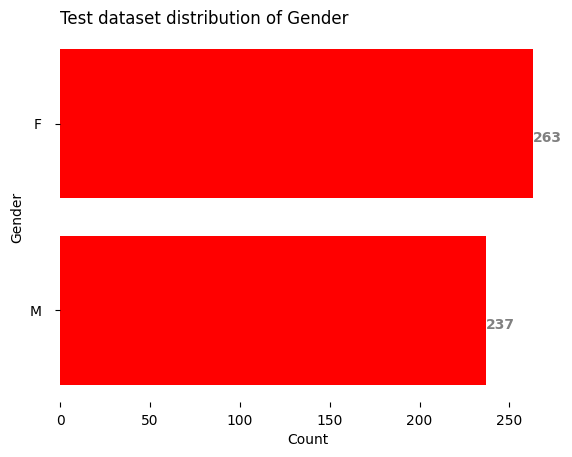

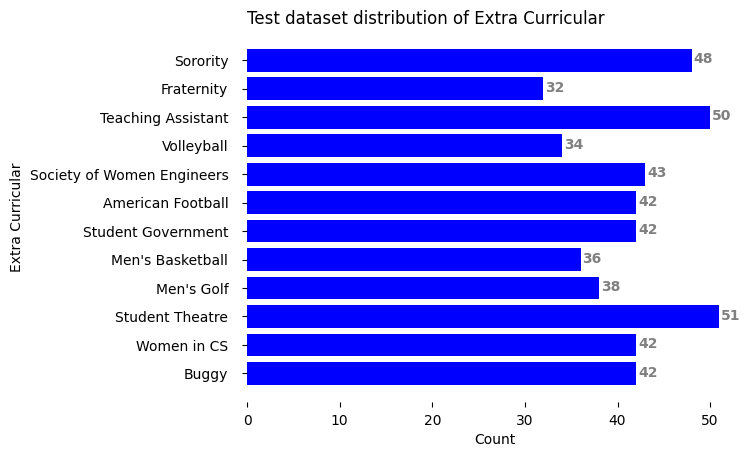

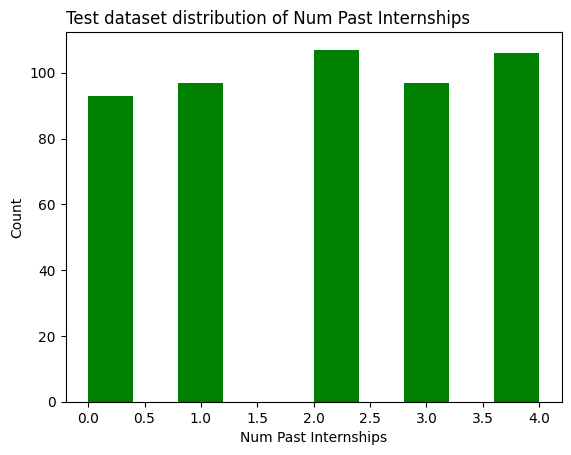

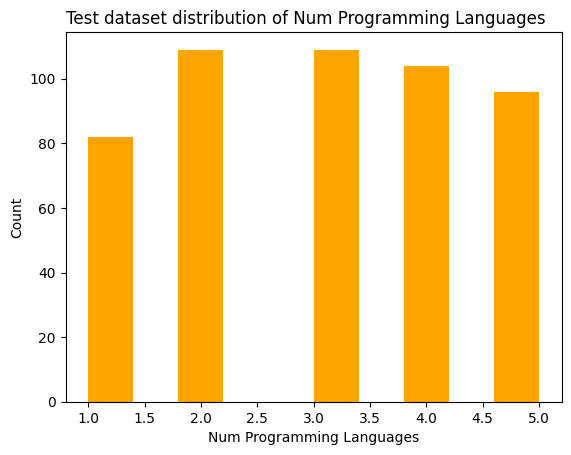

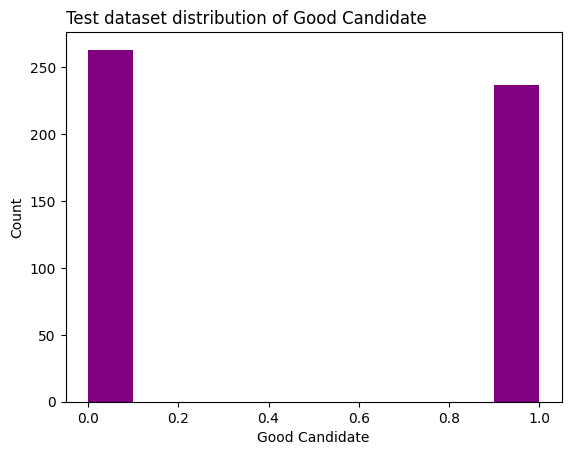

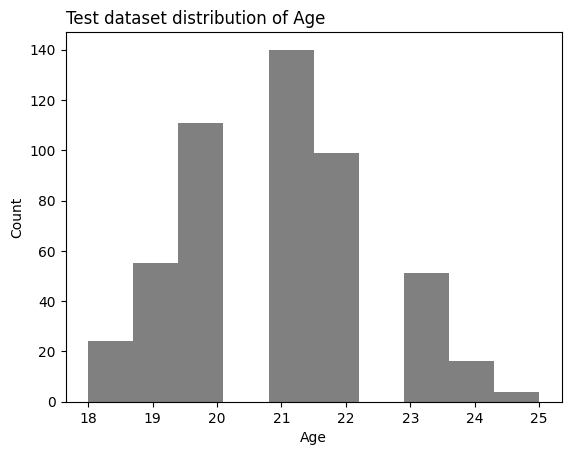

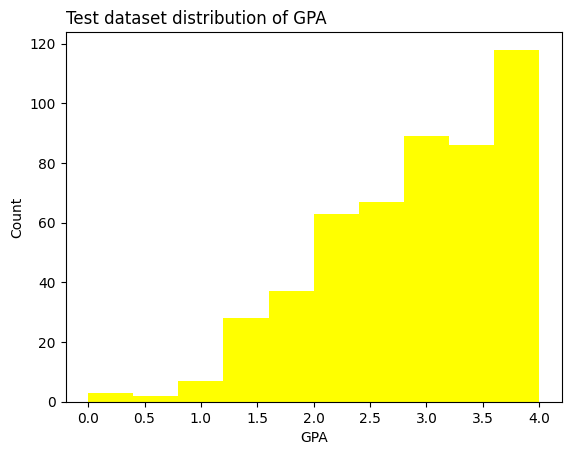

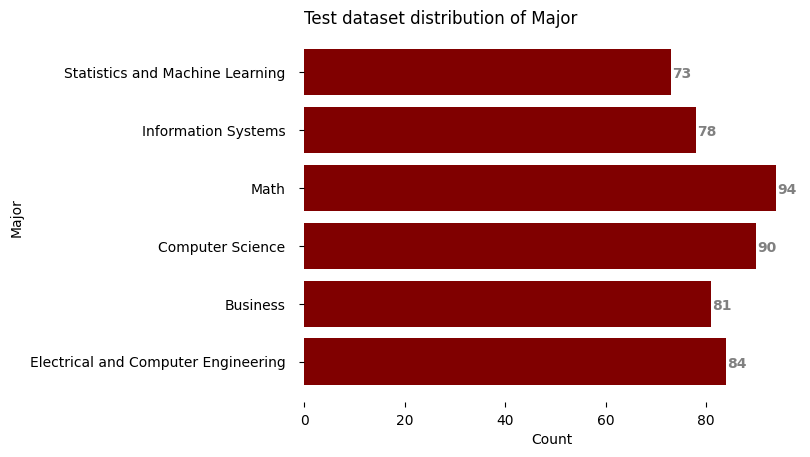

In [102]:
plot_feature_distributions(test_data)

In [103]:
get_predictions(test_data)

In [104]:
matrix: Matrix = confusion_matrix(test_data)

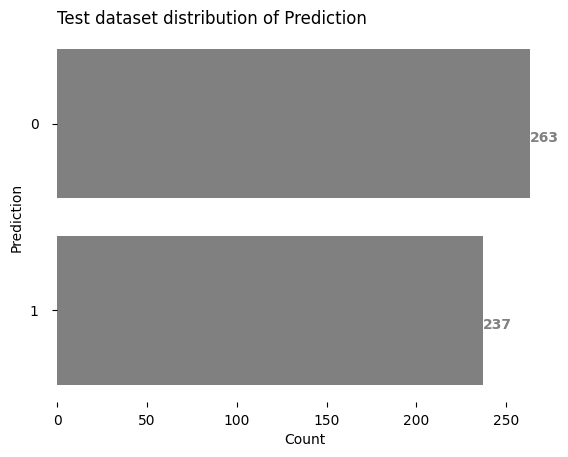

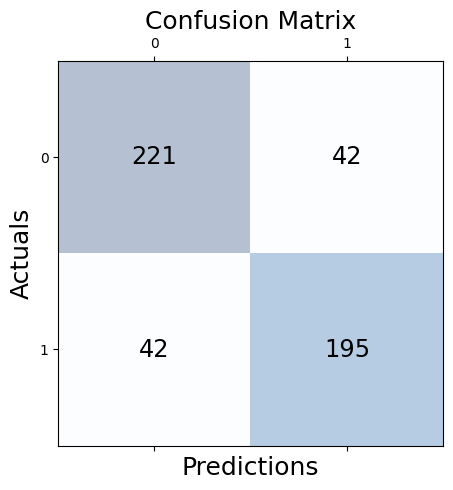

In [105]:
display_from_predictions(test_data, matrix)

In [106]:
report_from_predictions(matrix)

Correctly predicted: 416
Incorrectly predicted: 84
Accuracy: 0.832
False positives: 42
False negtives: 42
